In [230]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

from sklearn.preprocessing import KBinsDiscretizer


In [231]:
df = pd.read_csv('train_insurance.csv')
df.head()
#--------------------------------------------------
df_test=pd.read_csv('test_insurance.csv')


In [232]:
df.info()
#----------------------------------------------------
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 

In [233]:
df.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [234]:
df.describe()


,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


In [235]:
df = df.drop(columns=['Customer Id'])
#----------------------------------------------------
df_test = df_test.drop(columns=['Customer Id'])

In [236]:
df[df.duplicated()]


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
443,2012,1.0,1,V,N,O,R,999.0,Non-combustible,3,66130,non
584,2013,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
1601,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
1663,2014,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
1685,2014,1.0,0,V,V,V,U,NaN,Fire-resistive,without,NaN,non
1758,2013,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
1828,2013,0.5,1,V,V,V,U,NaN,Non-combustible,without,NaN,non
1987,2013,0.5,1,V,V,V,U,NaN,Non-combustible,without,NaN,non
2014,2012,1.0,0,V,N,O,R,400.0,Wood-framed,4,6069,non
2116,2012,1.0,0,N,V,V,U,250.0,Non-combustible,without,64122,non


In [237]:
df.drop_duplicates(inplace=True)
#----------------------------------------------------
df_test.drop_duplicates(inplace=True)

In [238]:
df[df.duplicated()]# no duplication


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim


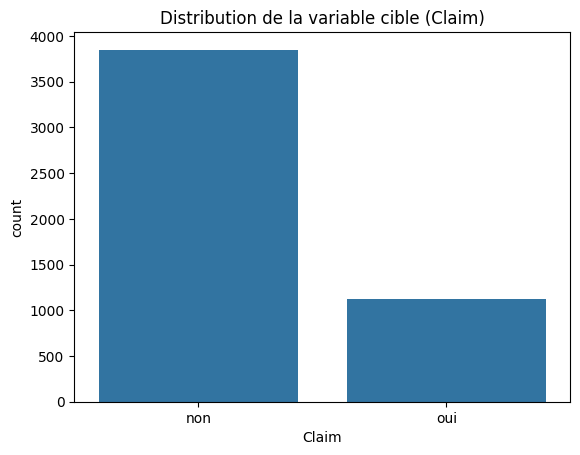

In [239]:
sns.countplot(x='Claim', data=df)
plt.title('Distribution de la variable cible (Claim)')
plt.show()

Residential
0    3474
1    1496
Name: count, dtype: int64


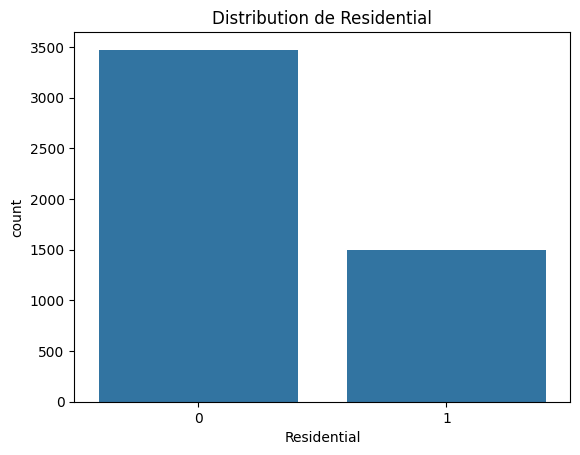

Building_Painted
V    3724
N    1246
Name: count, dtype: int64


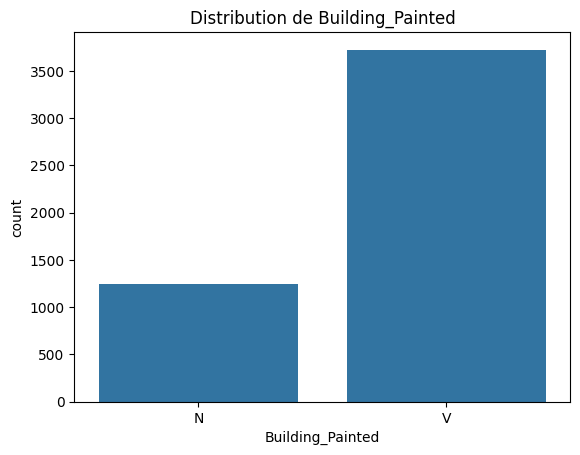

Building_Fenced
N    2529
V    2441
Name: count, dtype: int64


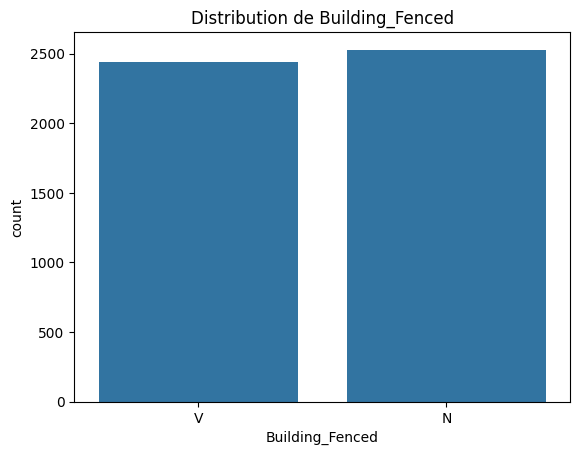

Garden
O    2526
V    2440
Name: count, dtype: int64


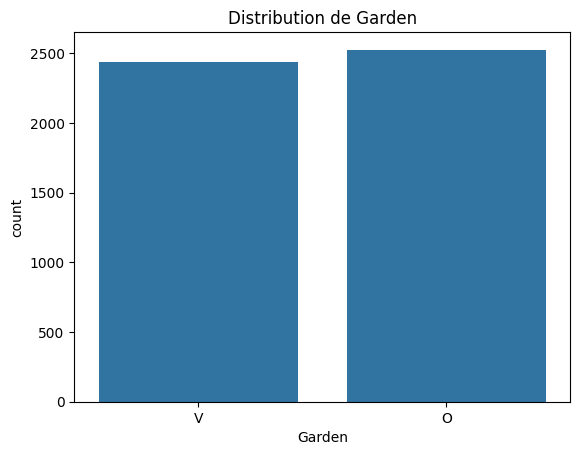

Settlement
R    2531
U    2439
Name: count, dtype: int64


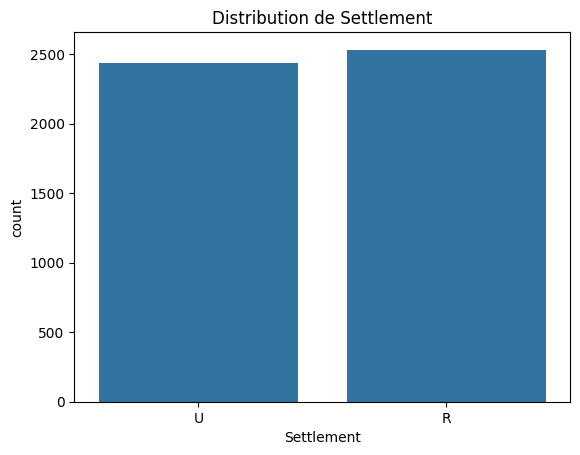

Building_Type
Non-combustible    2281
Fire-resistive     1197
Ordinary            851
Wood-framed         641
Name: count, dtype: int64


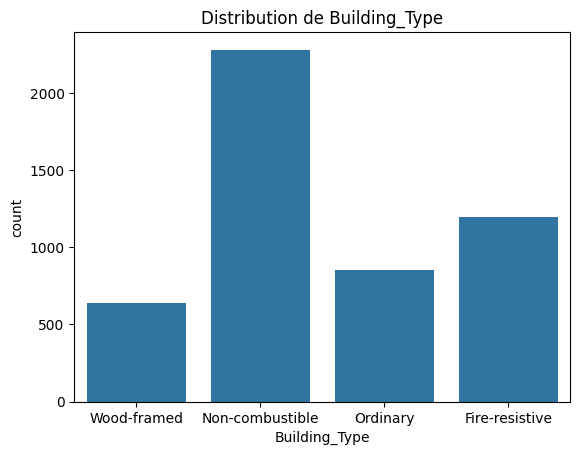

Insured_Period
1.0    3673
0.5    1297
Name: count, dtype: int64


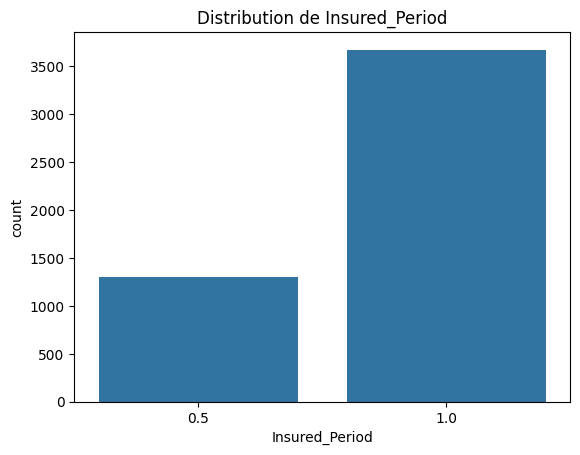

YearOfObservation
2012    1303
2013    1237
2014     967
2015     741
2016     722
Name: count, dtype: int64


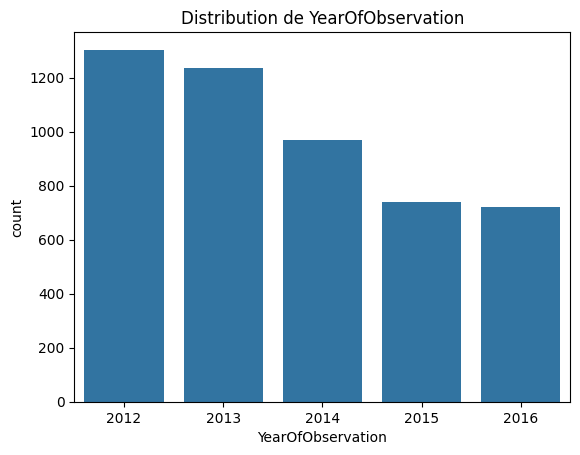

In [240]:
categorical_columns = ['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type','Insured_Period',"YearOfObservation"]

for column in categorical_columns:
    print(df[column].value_counts())
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution de {column}')
    plt.show()


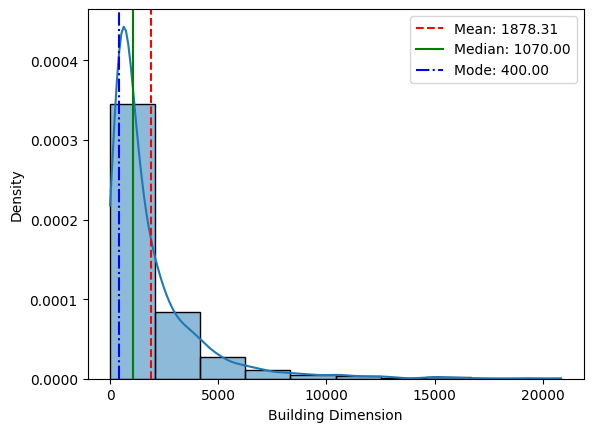

count     4925.000000
mean      1878.310863
std       2268.698000
min          1.000000
25%        523.000000
50%       1070.000000
75%       2285.000000
max      20840.000000
Name: Building Dimension, dtype: float64

In [241]:
mean_value = df['Building Dimension'].mean()
median_value = df['Building Dimension'].median()
mode_value = df['Building Dimension'].mode()[0]  # Le mode peut avoir plusieurs valeurs, on prend le premier

sns.histplot(x="Building Dimension", data=df,bins=10, kde=True, stat='density',)
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='b', linestyle='-.', label=f'Mode: {mode_value:.2f}')
# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()
df["Building Dimension"].describe()

# missingvalues

In [242]:
df[['Building Dimension']].isnull().sum()

Building Dimension    45
dtype: int64

In [243]:
imputer = KNNImputer(n_neighbors=5)

df[['Building Dimension']] = imputer.fit_transform(df[['Building Dimension']])
#----------------------------------------------------
df_test[['Building Dimension']] = imputer.fit_transform(df_test[['Building Dimension']])

In [244]:
df[['Building Dimension']].isnull().sum()

Building Dimension    0
dtype: int64

In [245]:
df['Geo_Code'] = pd.to_numeric(df['Geo_Code'], errors='coerce')
#----------------------------------------------------
df_test['Geo_Code'] = pd.to_numeric(df_test['Geo_Code'], errors='coerce')

In [246]:
df[['Geo_Code']].isnull().sum()
#----------------------------------------------------
df_test[['Geo_Code']].isnull().sum()

Geo_Code    54
dtype: int64

In [247]:
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer only to the "Building Dimension" column
df[['Geo_Code']] = imputer.fit_transform(df[['Geo_Code']])
#----------------------------------------------------
df_test[['Geo_Code']] = imputer.fit_transform(df_test[['Geo_Code']])

In [248]:
df[['Geo_Code']].isnull().sum()
#----------------------------------------------------
df_test[['Geo_Code']].isnull().sum()

Geo_Code    0
dtype: int64

In [249]:
df[['Garden']].isnull().sum()


Garden    4
dtype: int64

In [250]:
df['Garden'].fillna(df['Garden'].mode()[0], inplace=True)
#----------------------------------------------------
df_test['Garden'].fillna(df_test['Garden'].mode()[0], inplace=True)


C:\Users\faresmakki\AppData\Local\Temp\ipykernel_748\297939195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Garden'].fillna(df['Garden'].mode()[0], inplace=True)
C:\Users\faresmakki\AppData\Local\Temp\ipykernel_748\297939195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [251]:
df[['Garden']].isnull().sum()


Garden    0
dtype: int64

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4970 entries, 0 to 5011
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   4970 non-null   int64  
 1   Insured_Period      4970 non-null   float64
 2   Residential         4970 non-null   int64  
 3   Building_Painted    4970 non-null   object 
 4   Building_Fenced     4970 non-null   object 
 5   Garden              4970 non-null   object 
 6   Settlement          4970 non-null   object 
 7   Building Dimension  4970 non-null   float64
 8   Building_Type       4970 non-null   object 
 9   NumberOfWindows     4970 non-null   object 
 10  Geo_Code            4970 non-null   float64
 11  Claim               4970 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 504.8+ KB


# Building Dimention

In [253]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.000000,Wood-framed,without,75117.000000,non
1,2012,1.0,0,N,V,V,U,900.000000,Non-combustible,without,62916.000000,non
2,2013,1.0,1,V,N,O,R,4984.000000,Non-combustible,4,31149.000000,oui
3,2016,0.5,0,N,V,V,U,600.000000,Wood-framed,without,6012.000000,oui
4,2012,1.0,0,N,V,V,U,900.000000,Non-combustible,without,57631.000000,non
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,N,V,V,U,550.000000,Ordinary,without,33063.000000,oui
5008,2012,0.5,0,V,N,O,R,1000.000000,Fire-resistive,4,13004.000000,non
5009,2015,1.0,1,V,N,O,R,480.000000,Ordinary,3,94059.000000,non
5010,2012,0.5,0,V,N,O,R,536.000000,Fire-resistive,4,74243.000000,non


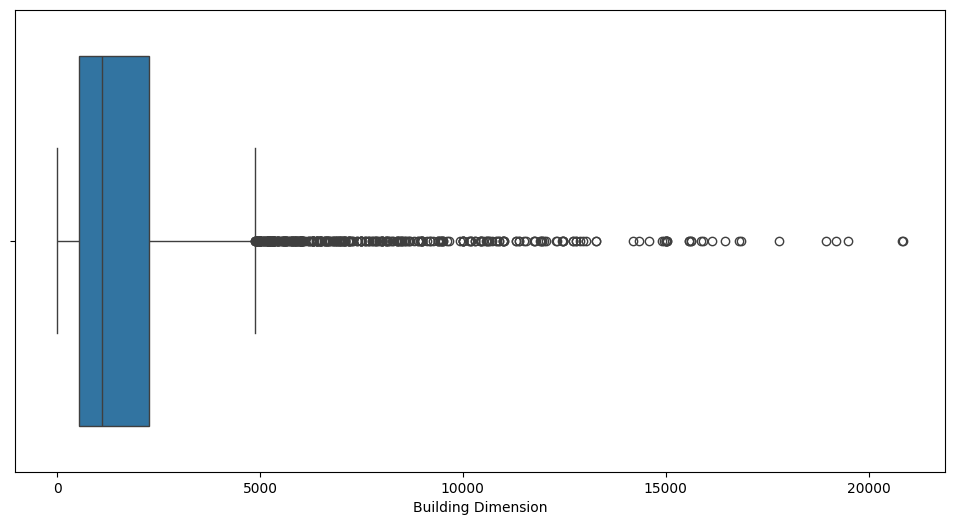

In [254]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x="Building Dimension",)
plt.show()

In [255]:
Q1 = df['Building Dimension'].quantile(0.25)
Q3 = df['Building Dimension'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Building Dimension'] < lower_bound) | (df['Building Dimension'] > upper_bound)]
lower_bound,upper_bound,Q3 , Q1,IQR ,len(outliers)
# len(outliers)#nombre des outliers391

(np.float64(-2076.625),
 np.float64(4874.375),
 np.float64(2267.75),
 np.float64(530.0),
 np.float64(1737.75),
 392)

In [256]:
min_threshold = 100  # Define a realistic minimum for building dimensions
df.loc[df['Building Dimension'] < min_threshold, 'Building Dimension'] = min_threshold
#----------------------------------------------------
df_test.loc[df_test['Building Dimension'] < min_threshold, 'Building Dimension'] = min_threshold

In [257]:
upper_cap = df['Building Dimension'].quantile(0.995)  # Use the 99.5th percentile as cap
df.loc[df['Building Dimension'] > upper_cap, 'Building Dimension'] = upper_cap
#----------------------------------------------------
df_test.loc[df_test['Building Dimension'] > upper_cap, 'Building Dimension'] = upper_cap


In [258]:
df['Building Dimension'].describe() 

count     4970.000000
mean      1868.261114
std       2189.810186
min        100.000000
25%        530.000000
50%       1100.000000
75%       2267.750000
max      14388.750000
Name: Building Dimension, dtype: float64

In [259]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['Building Dimension'] = scaler.fit_transform(df[['Building Dimension']])
#----------------------------------------------------
df_test['Building Dimension'] = scaler.fit_transform(df_test[['Building Dimension']])


In [260]:
df['Building Dimension'].describe()

count    4970.000000
mean        0.442101
std         1.260141
min        -0.575457
25%        -0.328010
50%         0.000000
75%         0.671990
max         7.647101
Name: Building Dimension, dtype: float64

# DataTransformation 


In [261]:

ord_categories= [ ["2012", "2013", "2014", "2015", "2016"]]
enc1 = OrdinalEncoder(categories=ord_categories)
df[["YearOfObservation"]]=enc1.fit_transform(
df.loc[:,["YearOfObservation"]])
#----------------------------------------------------
df_test[["YearOfObservation"]]=enc1.fit_transform(
df_test.loc[:,["YearOfObservation"]])


In [262]:
df["YearOfObservation"].value_counts()

YearOfObservation
0.0    1303
1.0    1237
2.0     967
3.0     741
4.0     722
Name: count, dtype: int64

In [263]:
df=pd.get_dummies(df, columns=['Insured_Period', 'Garden', 'Building_Type',"Settlement","Building_Fenced","Building_Painted","Residential"], dtype='int32')
#----------------------------------------------------
df_test=pd.get_dummies(df_test, columns=['Insured_Period', 'Garden', 'Building_Type',"Settlement","Building_Fenced","Building_Painted","Residential"], dtype='int32')

In [264]:
df

,YearOfObservation,Building Dimension,NumberOfWindows,Geo_Code,Claim,Insured_Period_0.5,Insured_Period_1.0,Garden_O,Garden_V,Building_Type_Fire-resistive,...,Building_Type_Ordinary,Building_Type_Wood-framed,Settlement_R,Settlement_U,Building_Fenced_N,Building_Fenced_V,Building_Painted_N,Building_Painted_V,Residential_0,Residential_1
0,0.0,0.080564,without,75117.000000,non,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,0.0,-0.115091,without,62916.000000,non,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
2,1.0,2.235074,4,31149.000000,oui,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,1
3,4.0,-0.287728,without,6012.000000,oui,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
4,0.0,-0.115091,without,57631.000000,non,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,-0.316501,without,33063.000000,oui,0,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
5008,0.0,-0.057546,4,13004.000000,non,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
5009,3.0,-0.356783,3,94059.000000,non,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,1
5010,0.0,-0.324558,4,74243.000000,non,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0


In [265]:
df['NumberOfWindows'].replace("without",0,inplace=True)
df['NumberOfWindows'].replace(">=10",10,inplace=True)
df['NumberOfWindows'] = df['NumberOfWindows'].astype(int)
#----------------------------------------------------
df_test['NumberOfWindows'].replace("without",0,inplace=True)
df_test['NumberOfWindows'].replace(">=10",10,inplace=True)
df_test['NumberOfWindows'] = df_test['NumberOfWindows'].astype(int)


C:\Users\faresmakki\AppData\Local\Temp\ipykernel_748\2747190810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfWindows'].replace("without",0,inplace=True)
C:\Users\faresmakki\AppData\Local\Temp\ipykernel_748\2747190810.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [266]:
freq_encoding = df['Geo_Code'].value_counts()  # fequencyencoder insted od onehot encoder
df['Geo_Code'] = df['Geo_Code'].map(freq_encoding)
#----------------------------------------------------
freq_encoding = df_test['Geo_Code'].value_counts()  # fequencyencoder insted od onehot encoder
df_test['Geo_Code'] = df_test['Geo_Code'].map(freq_encoding)


In [267]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 2146
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YearOfObservation              2142 non-null   float64
 1   Building Dimension             2142 non-null   float64
 2   NumberOfWindows                2142 non-null   int64  
 3   Geo_Code                       2142 non-null   int64  
 4   Claim                          2142 non-null   object 
 5   Insured_Period_0.5             2142 non-null   int32  
 6   Insured_Period_1.0             2142 non-null   int32  
 7   Garden_O                       2142 non-null   int32  
 8   Garden_V                       2142 non-null   int32  
 9   Building_Type_Fire-resistive   2142 non-null   int32  
 10  Building_Type_Non-combustible  2142 non-null   int32  
 11  Building_Type_Ordinary         2142 non-null   int32  
 12  Building_Type_Wood-framed      2142 non-null   int32 

In [268]:
df

,YearOfObservation,Building Dimension,NumberOfWindows,Geo_Code,Claim,Insured_Period_0.5,Insured_Period_1.0,Garden_O,Garden_V,Building_Type_Fire-resistive,...,Building_Type_Ordinary,Building_Type_Wood-framed,Settlement_R,Settlement_U,Building_Fenced_N,Building_Fenced_V,Building_Painted_N,Building_Painted_V,Residential_0,Residential_1
0,0.0,0.080564,0,32,non,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,0.0,-0.115091,0,3,non,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
2,1.0,2.235074,4,1,oui,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,1
3,4.0,-0.287728,0,25,oui,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
4,0.0,-0.115091,0,2,non,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,-0.316501,0,96,oui,0,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
5008,0.0,-0.057546,4,19,non,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
5009,3.0,-0.356783,3,1,non,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,1
5010,0.0,-0.324558,4,5,non,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0


# reduction des dementionaliter

In [269]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('Claim', axis=1)  
y = df['Claim']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#----------------------------------------------------
X_test = df_test.drop('Claim', axis=1)
y_test = df_test['Claim']

y_test_encoded = le.fit_transform(y_test)


In [270]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y_encoded)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.nlargest(10).index  # Adjust 10 to the number of features you want to keep
X_reduced= X[important_features]
#----------------------------------------------------
X_test_reduced= X_test[important_features]

In [271]:
X_reduced

,Building Dimension,Geo_Code,YearOfObservation,NumberOfWindows,Building_Type_Non-combustible,Residential_1,Residential_0,Building_Type_Wood-framed,Building_Type_Ordinary,Insured_Period_0.5
0,0.080564,32,0.0,0,0,1,0,1,0,0
1,-0.115091,3,0.0,0,1,0,1,0,0,0
2,2.235074,1,1.0,4,1,1,0,0,0,0
3,-0.287728,25,4.0,0,0,0,1,1,0,1
4,-0.115091,2,0.0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5007,-0.316501,96,1.0,0,0,0,1,0,1,0
5008,-0.057546,19,0.0,4,0,0,1,0,0,1
5009,-0.356783,1,3.0,3,0,1,0,0,1,0
5010,-0.324558,5,0.0,4,0,0,1,0,0,1


In [272]:
X_test_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Building Dimension             2142 non-null   float64
 1   Geo_Code                       2142 non-null   int64  
 2   YearOfObservation              2142 non-null   float64
 3   NumberOfWindows                2142 non-null   int64  
 4   Building_Type_Non-combustible  2142 non-null   int32  
 5   Residential_1                  2142 non-null   int32  
 6   Residential_0                  2142 non-null   int32  
 7   Building_Type_Wood-framed      2142 non-null   int32  
 8   Building_Type_Ordinary         2142 non-null   int32  
 9   Insured_Period_0.5             2142 non-null   int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 133.9 KB


In [273]:
X_test_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Building Dimension             2142 non-null   float64
 1   Geo_Code                       2142 non-null   int64  
 2   YearOfObservation              2142 non-null   float64
 3   NumberOfWindows                2142 non-null   int64  
 4   Building_Type_Non-combustible  2142 non-null   int32  
 5   Residential_1                  2142 non-null   int32  
 6   Residential_0                  2142 non-null   int32  
 7   Building_Type_Wood-framed      2142 non-null   int32  
 8   Building_Type_Ordinary         2142 non-null   int32  
 9   Insured_Period_0.5             2142 non-null   int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 133.9 KB


# use similar weight

In [274]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
import numpy as np
from imblearn.ensemble import BalancedRandomForestClassifier


kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

models = {
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "Random Forest": BalancedRandomForestClassifier(class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
}

results = {model_name: [] for model_name in models.keys()}
#----------------------------------------------------
results_test = {model_name: [] for model_name in models.keys()}

X_reduced_np = X_reduced.values
y_encoded_np = y_encoded
#----------------------------------------------------
X_test_reduced_np = X_test_reduced.values
y_test_encoded_np = y_test_encoded

for fold, (train_idx, test_idx) in enumerate(kf.split(X_reduced_np, y_encoded_np)):
    X_train, X_test = X_reduced_np[train_idx], X_reduced_np[test_idx]
    y_train, y_test = y_encoded_np[train_idx], y_encoded_np[test_idx]
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)  
        y_proba = model.predict_proba(X_test)[:, 1]  
        #----------------------------------------------------
        y_pred_test = model.predict(X_test_reduced)
        y_proba_test = model.predict_proba(X_test_reduced)[:, 1]
        
        
        report = classification_report(y_test, y_pred, output_dict=True)
        auc = roc_auc_score(y_test, y_proba)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        #----------------------------------------------------
        report_test = classification_report(y_test_encoded, y_pred_test, output_dict=True)
        auc_test = roc_auc_score(y_test_encoded, y_proba_test)
        accuracy_test = accuracy_score(y_test_encoded, y_pred_test)
        precision_test = precision_score(y_test_encoded, y_pred_test, pos_label=1)
        recall_test = recall_score(y_test_encoded, y_pred_test, pos_label=1)
        
        
        
        results[model_name].append({
            "fold": fold+1,
            "f1_score": report['1']['f1-score'],
            "precision": precision,
            "recall": recall,
            "roc_auc": auc,
            "accuracy": accuracy
        })
        #----------------------------------------------------
        results_test[model_name].append({
            "fold": fold+1,
            "f1_score": report_test['1']['f1-score'],
            "precision": precision_test,
            "recall": recall_test,
            "roc_auc": auc_test,
            "accuracy": accuracy_test
        })
        
        
      
# Summarize results
print("\nSummary of Results:")
for model_name, metrics in results.items():
    avg_f1 = np.mean([m['f1_score'] for m in metrics])
    avg_precision = np.mean([m['precision'] for m in metrics])
    avg_recall = np.mean([m['recall'] for m in metrics])
    avg_auc = np.mean([m['roc_auc'] for m in metrics])
    avg_acc = np.mean([m['accuracy'] for m in metrics])
    print(f"{model_name}: "
          f"Avg F1-Score = {avg_f1:.2f}, "
          f"Avg Precision = {avg_precision:.2f}, "
          f"Avg Recall = {avg_recall:.2f}, "
          f"Avg ROC-AUC = {avg_auc:.2f}, "
          f"Avg Accuracy = {avg_acc:.2f}")
#----------------------------------------------------
print("\nSummary of Results Test:")
for model_name, metrics in results_test.items():
    avg_f1 = np.mean([m['f1_score'] for m in metrics])
    avg_precision = np.mean([m['precision'] for m in metrics])
    avg_recall = np.mean([m['recall'] for m in metrics])
    avg_auc = np.mean([m['roc_auc'] for m in metrics])
    avg_acc = np.mean([m['accuracy'] for m in metrics])
    print(f"{model_name}: "
          f"Avg F1-Score = {avg_f1:.2f}, "
          f"Avg Precision = {avg_precision:.2f}, "
          f"Avg Recall = {avg_recall:.2f}, "
          f"Avg ROC-AUC = {avg_auc:.2f}, "
          f"Avg Accuracy = {avg_acc:.2f}")


Fold 1


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 2


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 3


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 4


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 5


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 6


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 7


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 8


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 9


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

Fold 10


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.


Summary of Results:
SVM: Avg F1-Score = 0.41, Avg Precision = 0.38, Avg Recall = 0.45, Avg ROC-AUC = 0.68, Avg Accuracy = 0.71
Random Forest: Avg F1-Score = 0.44, Avg Precision = 0.35, Avg Recall = 0.60, Avg ROC-AUC = 0.67, Avg Accuracy = 0.65
Logistic Regression: Avg F1-Score = 0.46, Avg Precision = 0.39, Avg Recall = 0.56, Avg ROC-AUC = 0.70, Avg Accuracy = 0.70

Summary of Results Test:
SVM: Avg F1-Score = 0.40, Avg Precision = 0.44, Avg Recall = 0.36, Avg ROC-AUC = 0.69, Avg Accuracy = 0.74
Random Forest: Avg F1-Score = 0.46, Avg Precision = 0.37, Avg Recall = 0.58, Avg ROC-AUC = 0.68, Avg Accuracy = 0.67
Logistic Regression: Avg F1-Score = 0.47, Avg Precision = 0.41, Avg Recall = 0.55, Avg ROC-AUC = 0.71, Avg Accuracy = 0.70


C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BalancedRandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BalancedRandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# overSimpling

In [275]:
#Duplication
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC


X_reduced = X_reduced.to_numpy() if hasattr(X_reduced, 'to_numpy') else X_reduced
y_encoded = y_encoded.to_numpy() if hasattr(y_encoded, 'to_numpy') else y_encoded
#----------------------------------------------------
X_test_reduced = X_test_reduced.to_numpy() if hasattr(X_test_reduced, 'to_numpy') else X_test_reduced
y_test_encoded = y_test_encoded.to_numpy() if hasattr(y_test_encoded, 'to_numpy') else y_test_encoded
n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

lr_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
brf_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
svm_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
#----------------------------------------------------
lr_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
brf_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
svm_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

for train_index, valid_index in kf.split(X_reduced, y_encoded):
    
    X_train, X_valid = X_reduced[train_index], X_reduced[valid_index]
    y_train, y_valid = y_encoded[train_index], y_encoded[valid_index]


    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


    lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=20000)
    lr_model.fit(X_train_resampled, y_train_resampled)
    lr_pred = lr_model.predict(X_valid)
    #----------------------------------------------------
    lr_pred_test = lr_model.predict(X_test_reduced)
    
    lr_metrics['recall'].append(recall_score(y_valid, lr_pred, pos_label=1))
    lr_metrics['accuracy'].append(accuracy_score(y_valid, lr_pred))
    lr_metrics['precision'].append(precision_score(y_valid, lr_pred, pos_label=1))
    lr_metrics['f1'].append(f1_score(y_valid, lr_pred, pos_label=1))
    #----------------------------------------------------
    lr_metrics_test['recall'].append(recall_score(y_test_encoded, lr_pred_test, pos_label=1))
    lr_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, lr_pred_test))
    lr_metrics_test['precision'].append(precision_score(y_test_encoded, lr_pred_test, pos_label=1))
    lr_metrics_test['f1'].append(f1_score(y_test_encoded, lr_pred_test, pos_label=1))


    brf_model = BalancedRandomForestClassifier(random_state=42)
    brf_model.fit(X_train_resampled, y_train_resampled)
    brf_pred = brf_model.predict(X_valid)
    #----------------------------------------------------
    brf_pred_test = brf_model.predict(X_test_reduced)
    
    brf_metrics['recall'].append(recall_score(y_valid, brf_pred, pos_label=1))
    brf_metrics['accuracy'].append(accuracy_score(y_valid, brf_pred))
    brf_metrics['precision'].append(precision_score(y_valid, brf_pred, pos_label=1))
    brf_metrics['f1'].append(f1_score(y_valid, brf_pred, pos_label=1))
    #----------------------------------------------------
    brf_metrics_test['recall'].append(recall_score(y_test_encoded, brf_pred_test, pos_label=1))
    brf_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, brf_pred_test))
    brf_metrics_test['precision'].append(precision_score(y_test_encoded, brf_pred_test, pos_label=1))
    brf_metrics_test['f1'].append(f1_score(y_test_encoded, brf_pred_test, pos_label=1))

    svm_model = SVC(class_weight='balanced', kernel="rbf", max_iter=20000)
    svm_model.fit(X_train_resampled, y_train_resampled)
    svm_pred = svm_model.predict(X_valid)
    #----------------------------------------------------
    svm_pred_test = svm_model.predict(X_test_reduced)
    
    svm_metrics['recall'].append(recall_score(y_valid, svm_pred, pos_label=1))
    svm_metrics['accuracy'].append(accuracy_score(y_valid, svm_pred))
    svm_metrics['precision'].append(precision_score(y_valid, svm_pred, pos_label=1))
    svm_metrics['f1'].append(f1_score(y_valid, svm_pred, pos_label=1))
    #----------------------------------------------------
    svm_metrics_test['recall'].append(recall_score(y_test_encoded, svm_pred_test, pos_label=1))
    svm_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, svm_pred_test))
    svm_metrics_test['precision'].append(precision_score(y_test_encoded, svm_pred_test, pos_label=1))
    svm_metrics_test['f1'].append(f1_score(y_test_encoded, svm_pred_test, pos_label=1))

def print_avg_metrics(model_name, metrics):
    print(f"{model_name} - Average Recall across folds:", sum(metrics['recall']) / n_splits)
    print(f"{model_name} - Average Accuracy across folds:", sum(metrics['accuracy']) / n_splits)
    print(f"{model_name} - Average Precision across folds:", sum(metrics['precision']) / n_splits)
    print(f"{model_name} - Average F1 Score across folds:", sum(metrics['f1']) / n_splits)
#----------------------------------------------------
    
print_avg_metrics("Logistic Regression with Oversampling", lr_metrics)
print_avg_metrics("Balanced Random Forest Classifier with Oversampling", brf_metrics)
print_avg_metrics("SVM with Oversampling", svm_metrics)
#----------------------------------------------------
print_avg_metrics("Logistic Regression with Oversampling Test", lr_metrics_test)
print_avg_metrics("Balanced Random Forest Classifier with Oversampling Test", brf_metrics_test)
print_avg_metrics("SVM with Oversampling Test", svm_metrics_test)


C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behavi

Logistic Regression with Oversampling - Average Recall across folds: 0.5495496207332491
Logistic Regression with Oversampling - Average Accuracy across folds: 0.6979879275653923
Logistic Regression with Oversampling - Average Precision across folds: 0.38272812910516857
Logistic Regression with Oversampling - Average F1 Score across folds: 0.4505088009191926
Balanced Random Forest Classifier with Oversampling - Average Recall across folds: 0.33900916561314787
Balanced Random Forest Classifier with Oversampling - Average Accuracy across folds: 0.7321931589537224
Balanced Random Forest Classifier with Oversampling - Average Precision across folds: 0.39548597216652714
Balanced Random Forest Classifier with Oversampling - Average F1 Score across folds: 0.36387930311152356
SVM with Oversampling - Average Recall across folds: 0.46570006321112506
SVM with Oversampling - Average Accuracy across folds: 0.7175050301810865
SVM with Oversampling - Average Precision across folds: 0.3927759210620224


In [ ]:
#Generation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC

n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

lr_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
brf_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
svm_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
#----------------------------------------------------
lr_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
brf_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
svm_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
smote = SMOTE(sampling_strategy='auto', random_state=42)

for train_index, valid_index in kf.split(X_reduced, y_encoded):
    X_train, X_valid = X_reduced[train_index], X_reduced[valid_index]
    y_train, y_valid = y_encoded[train_index], y_encoded[valid_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=20000)
    lr_model.fit(X_train_resampled, y_train_resampled)
    lr_pred = lr_model.predict(X_valid)
    #----------------------------------------------------
    lr_pred_test = lr_model.predict(X_test_reduced)
    
    lr_metrics['recall'].append(recall_score(y_valid, lr_pred, pos_label=1))
    lr_metrics['accuracy'].append(accuracy_score(y_valid, lr_pred))
    lr_metrics['precision'].append(precision_score(y_valid, lr_pred, pos_label=1))
    lr_metrics['f1'].append(f1_score(y_valid, lr_pred, pos_label=1))
    #----------------------------------------------------
    lr_metrics_test['recall'].append(recall_score(y_test_encoded, lr_pred_test, pos_label=1))
    lr_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, lr_pred_test))
    lr_metrics_test['precision'].append(precision_score(y_test_encoded, lr_pred_test, pos_label=1))
    lr_metrics_test['f1'].append(f1_score(y_test_encoded, lr_pred_test, pos_label=1))
    brf_model = BalancedRandomForestClassifier(random_state=42)
    brf_model.fit(X_train_resampled, y_train_resampled)
    brf_pred = brf_model.predict(X_valid)
    #----------------------------------------------------
    brf_pred_test = brf_model.predict(X_test_reduced)
    
    brf_metrics['recall'].append(recall_score(y_valid, brf_pred, pos_label=1))
    brf_metrics['accuracy'].append(accuracy_score(y_valid, brf_pred))
    brf_metrics['precision'].append(precision_score(y_valid, brf_pred, pos_label=1))
    brf_metrics['f1'].append(f1_score(y_valid, brf_pred, pos_label=1))
#----------------------------------------------------
    brf_metrics_test['recall'].append(recall_score(y_test_encoded, brf_pred_test, pos_label=1))
    brf_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, brf_pred_test))
    brf_metrics_test['precision'].append(precision_score(y_test_encoded, brf_pred_test, pos_label=1))
    brf_metrics_test['f1'].append(f1_score(y_test_encoded, brf_pred_test, pos_label=1))
    svm_model = SVC(class_weight='balanced', kernel="rbf", max_iter=20000)
    svm_model.fit(X_train_resampled, y_train_resampled)
    svm_pred = svm_model.predict(X_valid)
    #----------------------------------------------------
    svm_pred_test = svm_model.predict(X_test_reduced)
    
    
    svm_metrics['recall'].append(recall_score(y_valid, svm_pred, pos_label=1))
    svm_metrics['accuracy'].append(accuracy_score(y_valid, svm_pred))
    svm_metrics['precision'].append(precision_score(y_valid, svm_pred, pos_label=1))
    svm_metrics['f1'].append(f1_score(y_valid, svm_pred, pos_label=1))
    #----------------------------------------------------
    svm_metrics_test['recall'].append(recall_score(y_test_encoded, svm_pred_test, pos_label=1))
    svm_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, svm_pred_test))
    svm_metrics_test['precision'].append(precision_score(y_test_encoded, svm_pred_test, pos_label=1))
    svm_metrics_test['f1'].append(f1_score(y_test_encoded, svm_pred_test, pos_label=1))

def print_avg_metrics(model_name, metrics):
    print(f"{model_name} - Average Recall across folds:", sum(metrics['recall']) / n_splits)
    print(f"{model_name} - Average Accuracy across folds:", sum(metrics['accuracy']) / n_splits)
    print(f"{model_name} - Average Precision across folds:", sum(metrics['precision']) / n_splits)
    print(f"{model_name} - Average F1 Score across folds:", sum(metrics['f1']) / n_splits)

print_avg_metrics("Logistic Regression with SMOTE", lr_metrics)
print_avg_metrics("Balanced Random Forest Classifier with SMOTE", brf_metrics)
print_avg_metrics("SVM with SMOTE", svm_metrics)
#----------------------------------------------------
print_avg_metrics("Logistic Regression with SMOTE Test", lr_metrics_test)
print_avg_metrics("Balanced Random Forest Classifier with SMOTE Test", brf_metrics_test)
print_avg_metrics("SVM with SMOTE Test", svm_metrics_test)

# under simpling

In [276]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC


n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define metrics storage
lr_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
brf_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
svm_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
#----------------------------------------------------
lr_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
brf_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
svm_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

for train_index, valid_index in kf.split(X_reduced, y_encoded):

    X_train, X_valid = X_reduced[train_index], X_reduced[valid_index]
    y_train, y_valid = y_encoded[train_index], y_encoded[valid_index]


    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


    lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=20000)
    lr_model.fit(X_train_resampled, y_train_resampled)
    lr_pred = lr_model.predict(X_valid)
    #----------------------------------------------------
    lr_pred_test = lr_model.predict(X_test_reduced)
    
    lr_metrics['recall'].append(recall_score(y_valid, lr_pred, pos_label=1))
    lr_metrics['accuracy'].append(accuracy_score(y_valid, lr_pred))
    lr_metrics['precision'].append(precision_score(y_valid, lr_pred, pos_label=1))
    lr_metrics['f1'].append(f1_score(y_valid, lr_pred, pos_label=1))
    #----------------------------------------------------
    lr_metrics_test['recall'].append(recall_score(y_test_encoded, lr_pred_test, pos_label=1))
    lr_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, lr_pred_test))
    lr_metrics_test['precision'].append(precision_score(y_test_encoded, lr_pred_test, pos_label=1))
    lr_metrics_test['f1'].append(f1_score(y_test_encoded, lr_pred_test, pos_label=1))
    

    brf_model = BalancedRandomForestClassifier(random_state=42)
    brf_model.fit(X_train_resampled, y_train_resampled)
    brf_pred = brf_model.predict(X_valid)
    #----------------------------------------------------
    brf_pred_test = brf_model.predict(X_test_reduced)
    
    
    brf_metrics['recall'].append(recall_score(y_valid, brf_pred, pos_label=1))
    brf_metrics['accuracy'].append(accuracy_score(y_valid, brf_pred))
    brf_metrics['precision'].append(precision_score(y_valid, brf_pred, pos_label=1))
    brf_metrics['f1'].append(f1_score(y_valid, brf_pred, pos_label=1))
    #----------------------------------------------------
    brf_metrics_test['recall'].append(recall_score(y_test_encoded, brf_pred_test, pos_label=1))
    brf_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, brf_pred_test))
    brf_metrics_test['precision'].append(precision_score(y_test_encoded, brf_pred_test, pos_label=1))
    brf_metrics_test['f1'].append(f1_score(y_test_encoded, brf_pred_test, pos_label=1))
    

    svm_model = SVC(class_weight='balanced', kernel="rbf", max_iter=20000)
    svm_model.fit(X_train_resampled, y_train_resampled)
    svm_pred = svm_model.predict(X_valid)
    #----------------------------------------------------
    svm_pred_test = svm_model.predict(X_test_reduced)
    
    svm_metrics['recall'].append(recall_score(y_valid, svm_pred, pos_label=1))
    svm_metrics['accuracy'].append(accuracy_score(y_valid, svm_pred))
    svm_metrics['precision'].append(precision_score(y_valid, svm_pred, pos_label=1))
    svm_metrics['f1'].append(f1_score(y_valid, svm_pred, pos_label=1))
    #----------------------------------------------------
    svm_metrics_test['recall'].append(recall_score(y_test_encoded, svm_pred_test, pos_label=1))
    svm_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, svm_pred_test))
    svm_metrics_test['precision'].append(precision_score(y_test_encoded, svm_pred_test, pos_label=1))
    svm_metrics_test['f1'].append(f1_score(y_test_encoded, svm_pred_test, pos_label=1))


def print_avg_metrics(model_name, metrics):
    print(f"{model_name} - Average Recall across folds:", sum(metrics['recall']) / n_splits)
    print(f"{model_name} - Average Accuracy across folds:", sum(metrics['accuracy']) / n_splits)
    print(f"{model_name} - Average Precision across folds:", sum(metrics['precision']) / n_splits)
    print(f"{model_name} - Average F1 Score across folds:", sum(metrics['f1']) / n_splits)

print_avg_metrics("Logistic Regression with Undersampling", lr_metrics)
print_avg_metrics("Balanced Random Forest Classifier with Undersampling", brf_metrics)
print_avg_metrics("SVM with Undersampling", svm_metrics)
#----------------------------------------------------
print_avg_metrics("Logistic Regression with Undersampling Test", lr_metrics_test)
print_avg_metrics("Balanced Random Forest Classifier with Undersampling Test", brf_metrics_test)
print_avg_metrics("SVM with Undersampling Test", svm_metrics_test)


C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\faresmakki\pythonProject\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behavi

Logistic Regression with Undersampling - Average Recall across folds: 0.5638353350189634
Logistic Regression with Undersampling - Average Accuracy across folds: 0.6981891348088531
Logistic Regression with Undersampling - Average Precision across folds: 0.38480382227217996
Logistic Regression with Undersampling - Average F1 Score across folds: 0.45694365844371776
Balanced Random Forest Classifier with Undersampling - Average Recall across folds: 0.6012642225031606
Balanced Random Forest Classifier with Undersampling - Average Accuracy across folds: 0.6189134808853118
Balanced Random Forest Classifier with Undersampling - Average Precision across folds: 0.3182674687665621
Balanced Random Forest Classifier with Undersampling - Average F1 Score across folds: 0.41598855489022857
SVM with Undersampling - Average Recall across folds: 0.43002528445006327
SVM with Undersampling - Average Accuracy across folds: 0.7090543259557344
SVM with Undersampling - Average Precision across folds: 0.3738935

In [277]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


bbc_lr_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
bbc_rf_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
bbc_svm_metrics = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
#----------------------------------------------------
bbc_lr_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
bbc_rf_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}
bbc_svm_metrics_test = {'recall': [], 'accuracy': [], 'precision': [], 'f1': []}


for train_index, valid_index in kf.split(X_reduced, y_encoded):

    X_train, X_valid = X_reduced[train_index], X_reduced[valid_index]
    y_train, y_valid = y_encoded[train_index], y_encoded[valid_index]


    bbc_lr = BalancedBaggingClassifier(
        estimator=LogisticRegression(max_iter=20000),
        sampling_strategy='auto',
        replacement=True,
        random_state=42
    )
    bbc_lr.fit(X_train, y_train)
    bbc_lr_pred = bbc_lr.predict(X_valid)
#----------------------------------------------------
    bbc_lr_pred_test = bbc_lr.predict(X_test_reduced)
    
    bbc_lr_metrics['recall'].append(recall_score(y_valid, bbc_lr_pred, pos_label=1))
    bbc_lr_metrics['accuracy'].append(accuracy_score(y_valid, bbc_lr_pred))
    bbc_lr_metrics['precision'].append(precision_score(y_valid, bbc_lr_pred, pos_label=1))
    bbc_lr_metrics['f1'].append(f1_score(y_valid, bbc_lr_pred, pos_label=1))
#----------------------------------------------------
    bbc_lr_metrics_test['recall'].append(recall_score(y_test_encoded, bbc_lr_pred_test, pos_label=1))
    bbc_lr_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, bbc_lr_pred_test))
    bbc_lr_metrics_test['precision'].append(precision_score(y_test_encoded, bbc_lr_pred_test, pos_label=1))
    bbc_lr_metrics_test['f1'].append(f1_score(y_test_encoded, bbc_lr_pred_test, pos_label=1))
    

    bbc_rf = BalancedBaggingClassifier(
        estimator=RandomForestClassifier(random_state=42),
        sampling_strategy='auto',
        replacement=True,
        random_state=42
    )
    bbc_rf.fit(X_train, y_train)
    bbc_rf_pred = bbc_rf.predict(X_valid)
#----------------------------------------------------
    bbc_rf_pred_test = bbc_rf.predict(X_test_reduced)

    bbc_rf_metrics['recall'].append(recall_score(y_valid, bbc_rf_pred, pos_label=1))
    bbc_rf_metrics['accuracy'].append(accuracy_score(y_valid, bbc_rf_pred))
    bbc_rf_metrics['precision'].append(precision_score(y_valid, bbc_rf_pred, pos_label=1))
    bbc_rf_metrics['f1'].append(f1_score(y_valid, bbc_rf_pred, pos_label=1))
#----------------------------------------------------
    bbc_rf_metrics_test['recall'].append(recall_score(y_test_encoded, bbc_rf_pred_test, pos_label=1))
    bbc_rf_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, bbc_rf_pred_test))
    bbc_rf_metrics_test['precision'].append(precision_score(y_test_encoded, bbc_rf_pred_test, pos_label=1))
    bbc_rf_metrics_test['f1'].append(f1_score(y_test_encoded, bbc_rf_pred_test, pos_label=1))
    

    bbc_svm = BalancedBaggingClassifier(
        estimator=SVC(kernel="rbf", max_iter=20000),
        sampling_strategy='auto',
        replacement=True,
        random_state=42
    )
    bbc_svm.fit(X_train, y_train)
    bbc_svm_pred = bbc_svm.predict(X_valid)
#----------------------------------------------------
    bbc_svm_pred_test = bbc_svm.predict(X_test_reduced)
    

    bbc_svm_metrics['recall'].append(recall_score(y_valid, bbc_svm_pred, pos_label=1))
    bbc_svm_metrics['accuracy'].append(accuracy_score(y_valid, bbc_svm_pred))
    bbc_svm_metrics['precision'].append(precision_score(y_valid, bbc_svm_pred, pos_label=1))
    bbc_svm_metrics['f1'].append(f1_score(y_valid, bbc_svm_pred, pos_label=1))
    #----------------------------------------------------
    bbc_svm_metrics_test['recall'].append(recall_score(y_test_encoded, bbc_svm_pred_test, pos_label=1))
    bbc_svm_metrics_test['accuracy'].append(accuracy_score(y_test_encoded, bbc_svm_pred_test))
    bbc_svm_metrics_test['precision'].append(precision_score(y_test_encoded, bbc_svm_pred_test, pos_label=1))
    bbc_svm_metrics_test['f1'].append(f1_score(y_test_encoded, bbc_svm_pred_test, pos_label=1))


def print_avg_metrics(model_name, metrics):
    print(f"{model_name} - Average Recall across folds:", sum(metrics['recall']) / n_splits)
    print(f"{model_name} - Average Accuracy across folds:", sum(metrics['accuracy']) / n_splits)
    print(f"{model_name} - Average Precision across folds:", sum(metrics['precision']) / n_splits)
    print(f"{model_name} - Average F1 Score across folds:", sum(metrics['f1']) / n_splits)

# Print average results
print_avg_metrics("Balanced Bagging Classifier with Logistic Regression", bbc_lr_metrics)
print_avg_metrics("Balanced Bagging Classifier with Random Forest", bbc_rf_metrics)
print_avg_metrics("Balanced Bagging Classifier with SVM", bbc_svm_metrics)
#----------------------------------------------------
print_avg_metrics("Balanced Bagging Classifier with Logistic Regression Test", bbc_lr_metrics_test)
print_avg_metrics("Balanced Bagging Classifier with Random Forest Test", bbc_rf_metrics_test)
print_avg_metrics("Balanced Bagging Classifier with SVM Test", bbc_svm_metrics_test)



Balanced Bagging Classifier with Logistic Regression - Average Recall across folds: 0.5602639064475348
Balanced Bagging Classifier with Logistic Regression - Average Accuracy across folds: 0.7012072434607646
Balanced Bagging Classifier with Logistic Regression - Average Precision across folds: 0.3883154672781258
Balanced Bagging Classifier with Logistic Regression - Average F1 Score across folds: 0.45807073893621875
Balanced Bagging Classifier with Random Forest - Average Recall across folds: 0.5825142225031605
Balanced Bagging Classifier with Random Forest - Average Accuracy across folds: 0.6758551307847083
Balanced Bagging Classifier with Random Forest - Average Precision across folds: 0.3642189485397561
Balanced Bagging Classifier with Random Forest - Average F1 Score across folds: 0.44757273623748406
Balanced Bagging Classifier with SVM - Average Recall across folds: 0.4139380530973451
Balanced Bagging Classifier with SVM - Average Accuracy across folds: 0.7106639839034206
Balanced